# Monte Carlo example

In [1]:
# Add PyTwoWay to system path (do not run this)
# import sys
# sys.path.append('../../..')

## Import the PyTwoWay package

Make sure to install it using `pip install pytwoway`.

In [2]:
import pytwoway as tw
import bipartitepandas as bpd

## First, check out parameter options

Do this by running:

- FE - `tw.fe_params().describe_all()`

- CRE - `tw.cre_params().describe_all()`

- Clustering - `bpd.cluster_params().describe_all()`

- Cleaning - `bpd.clean_params().describe_all()`

- Simulating - `bpd.sim_params().describe_all()`

Alternatively, run `x_params().keys()` to view all the keys for a parameter dictionary, then `x_params().describe(key)` to get a description for a single key.

## Second, set parameter choices

In [3]:
nl = 5 # Number of worker types
nk = 10 # Number of firm types
# FE
fe_params = tw.fe_params(
    {
        'he': True
    }
)
## Clustering ##
# Group using k-means
kmeans = bpd.grouping.KMeans(n_clusters=nk)
cluster_params = bpd.cluster_params(
    {
        'grouping': kmeans
    }
)
# Simulating
sim_params = bpd.sim_params({
    'n_workers': 1000,
    'nl': nl, 'nk': nk,
    'firm_size': 5,
    'alpha_sig': 2, 'w_sig': 2,
    'c_sort': 1.5, 'c_netw': 1.5,
    'p_move': 0.1
})

## Third, run the Monte Carlo simulation

In [ ]:
# Create the MonteCarlo object
twmc = tw.MonteCarlo(
    sim_params=sim_params,
    fe_params=fe_params,
    estimate_bs=True,
    cluster_params=cluster_params,
    collapse='spell',
    move_to_worker=False
)
# Run the Monte Carlo estimation
twmc.monte_carlo(
    N=500,
    ncore=8
)

## Finally, plot histograms of parameter estimates (histograms show the difference from the truth)

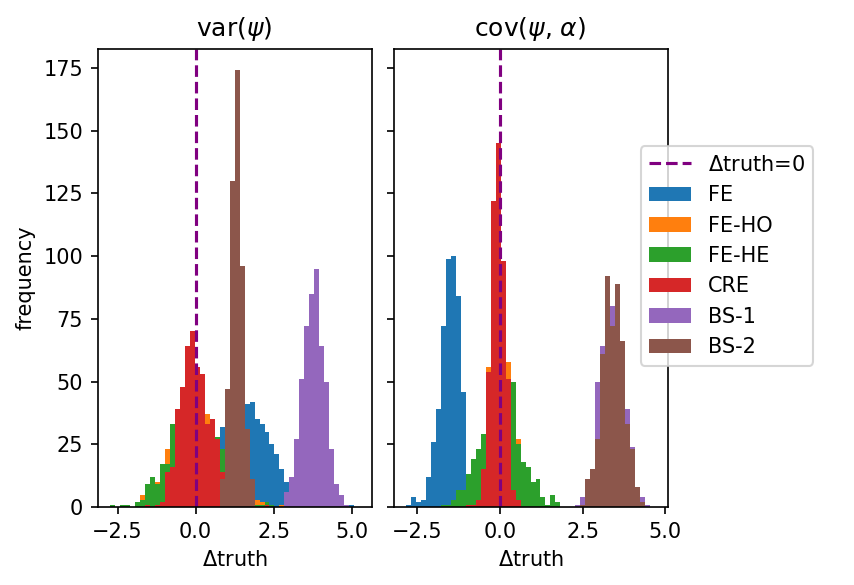

In [5]:
twmc.hist()